In [49]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [50]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [51]:
df_d = pd.get_dummies(df)
df_d = df_d.drop(["y_no", "duration"], axis=1)

In [52]:

features = list(df_d.drop(["y_yes"], axis = 1))
target = "y_yes"


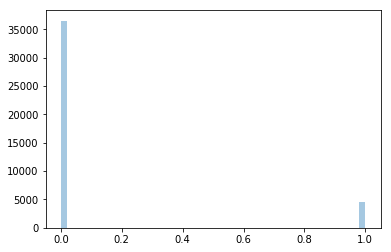

In [53]:
import seaborn as sns
x = np.array(df_d["y_yes"])
sns.distplot(x, kde = False, rug = False);

In [54]:
X = df_d.drop(['y_yes'], axis=1)
print X.head()

y = df_d[["y_yes"]]



   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  job_admin.        ...         \
0          -36.4      4.857       5191.0           0        ...          
1          -36.4      4.857       5191.0           0        ...          
2          -36.4      4.857       5191.0           0        ...          
3          -36.4      4.857       5191.0           1        ...          
4          -36.4      4.857       5191.0           0        ...          

   month_oct  month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0          0          0                0                1                0

In [55]:

clf = RandomForestClassifier(n_estimators = 10)



In [56]:

x = df_d.drop("y_yes", axis = 1)
y = df_d["y_yes"]
scores = cross_val_score(clf, x, y, cv = 10)

In [59]:
clf.fit(x,y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [60]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print indices
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest


[ 0  7  1  8  6  2  4  5 36 38 31  9  3 28 22 55 18 61 23 39 57 41 58 54 56
 30 10 27 13 33 16 21 60 34 25 43 59 42 32 26 14 50 15 11 17 19 12 52 49 37
 48 45 20 40 44 47 51 53 24 46 29 35]
Feature ranking:
1. age (0.163486)
2. euribor3m (0.097822)
3. campaign (0.086592)
4. nr.employed (0.063875)
5. cons.conf.idx (0.035119)
6. pdays (0.028440)
7. emp.var.rate (0.028392)
8. cons.price.idx (0.027897)
9. housing_no (0.020966)
10. housing_yes (0.020492)
11. education_university.degree (0.017970)
12. job_admin. (0.017142)
13. previous (0.016879)
14. education_high.school (0.016693)
15. marital_married (0.016038)
16. day_of_week_mon (0.015260)
17. job_technician (0.014439)
18. poutcome_success (0.014000)
19. marital_single (0.013917)
20. loan_no (0.013606)
21. day_of_week_tue (0.013486)
22. loan_yes (0.013230)
23. day_of_week_wed (0.013143)
24. day_of_week_fri (0.012956)
25. day_of_week_thu (0.012939)
26. education_professional.course (0.012644)
27. job_blue-collar (0.011668)
28. education_b

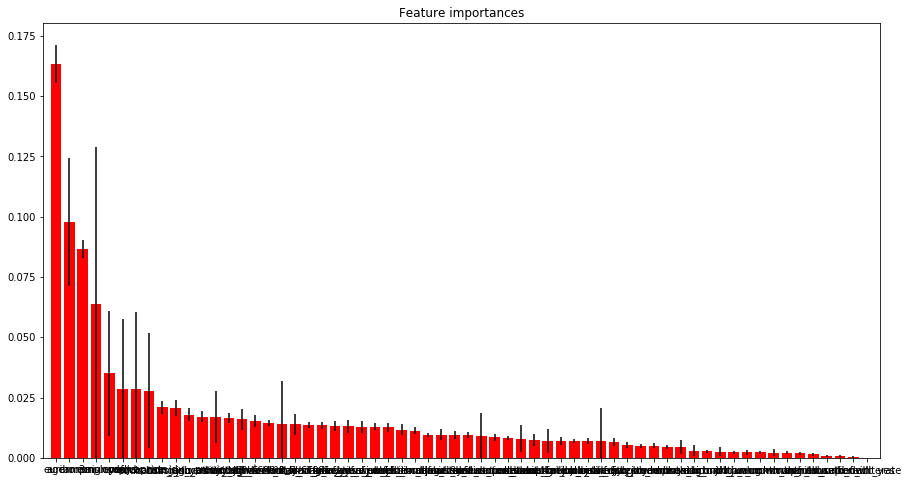

In [61]:
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("importances.png",bbox_inches='tight')
plt.savefig("importances.pdf",bbox_inches='tight')